# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No show Appointment Dataset as provided by **Kaggle** contains information of over 100k medical appointments in Brazil and focuses on whether or not a patient shows up for their appointment.
Below are the columns names in the dataset and their descriptions
<ul>
<li>PatientId - Identification of a patient</li>
<li>AppointmentID - Identification of each appointment</li>
<li>Gender - Gender of the patient</li>
<li>ScheduledDay - The day of the actual appointment, when they have to visit the doctor</li>
<li>AppointmentDay - The day someone called or registered the appointment, this is before appointment of course</li>
<li>Age - Age of the Patient</li>
<li>Neighborhood - Where the appointment takes place</li>
<li>Scholarship - If the patient is enrolled in the Brazil welfare program</li>
<li>Hipertension - If the patient is Hipertensive</li>
<li>Diabetes - If the patient is diabetic</li>
<li>Alcoholism - if the patient takes alcohol</li>
<li>Handcap  - If the patient is handicap</li>
<li>SMS_received - Checks if the patient received an SMS as regards the appointment</li>
<li>No-show - Indicates if the patient showed or not. YES if they didn't show and NO if they showed</li>
</ul>


### Question(s) for Analysis
<ol>
<li>What is the proportion of patient didn't show up for their Appointment?</li>
<li>What is the mean Age of patients that did not show up for their Appontment?</li>
<li>What is the proportion of more patients enrolled on the Welfare Program the didn't show for their appointment?</li>
<li>What category of disease have patients with no show Appointment</li>
<li>Do people that receive SMS show up for their Appointment?</li>   
<li>What Gender Didn't show up most for their appointments</li>    
</ol>

In [1]:
# Import all the packages need for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load the noshowappointments-kagglev2-may-2016.csv file
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [3]:
# Use the head() method to view our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape #To check the size of our data

(110527, 14)

In [5]:
#To see the column names and their datatypes and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum() #To check for duplicate rows

0

In [7]:
# To do a general statistics of our data
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


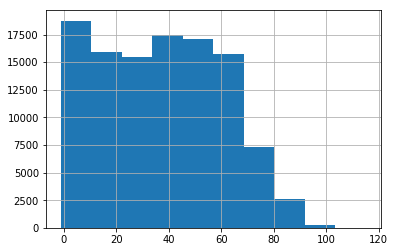

In [8]:
df.Age.hist();


### Data Cleaning
From the above information, **ScheduledDay** and **AppointmentDay** were stored as a __*string*__ data type rather than __*Datetime*__ data type, we will need to change that. Also for my analysis, columns like **PatientID**, **AppointmentID** and **Neighbourhood** will not be needed, so I will be dropping them

In [9]:
#Converting ScheduledDay and AppointmentDay to Datetime
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [11]:
#Dropping columns that are not needed for my analysis
#Because they are just give no meaning information during analysis
drop_columns = ['PatientId','AppointmentID','Neighbourhood']
df.drop(columns=drop_columns, inplace=True)

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the proportion of patient didn't show up for their Appointment)

In [13]:
#Filtering our data to indicate patient data showed up for their appointments and those that didn't.
no_show = df[df['No-show']=='Yes']
show = df[df['No-show']=='No']

In [14]:
#Getting the proportion of No_show patients
no_show_prop = no_show.shape[0]/df.shape[0]
no_show_prop

0.20193255946510807

In [15]:
#Getting the proportion of patients that showed for their appointment
show_prop = show.shape[0]/df.shape[0]
show_prop

0.798067440534892

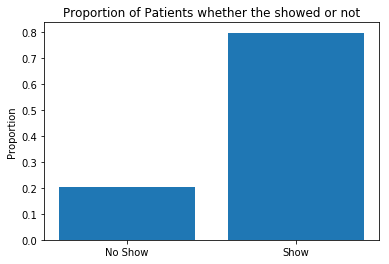

In [16]:
#Plotting a bar chat of the proportion
location=['No Show','Show']
height = [no_show_prop,show_prop]
plt.bar(location,height)
plt.title('Proportion of Patients whether the showed or not')
plt.ylabel('Proportion');

About **20%** of the patients didn't show up for their scheduled appointments

### Research Question 2  (What is the mean Age of patients that did not show up for their Appontment)

In [17]:
no_show.Age.mean()

34.317666562121957

In [18]:
#We can go further to check other statistics as reagrds the age using the describe() method
no_show.Age.describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

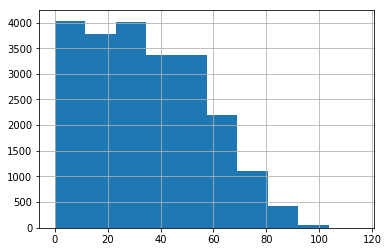

In [19]:
no_show.Age.hist();

The average age of patients that didn't show up for the appointment is around **34yrs**.

### Research Question 3  (What is the proportion of patients enrolled on the Welfare Program the didn't show for their appointment)
### Does been part of the Welfare Program actually contribute to patients not showing up?

In [20]:
#Showing the number of patients with and without welfare scheme
# 0 - No welfare scheme
# 1 - Available welfare scheme
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [21]:
#Lets look at the number of patients with and without welfare scheme that didn't show up for their appointments
no_show.Scholarship.value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

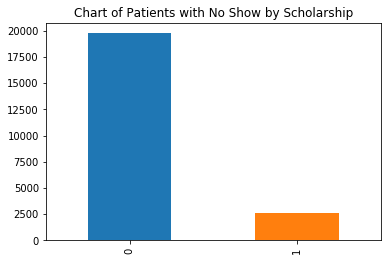

In [22]:
no_show.Scholarship.value_counts().plot(title='Chart of Patients with No Show by Scholarship', kind='bar')

In [23]:
#Proportion of Patient with welfare scheme that didn't show up for appointment
S_prop = no_show.Scholarship.sum()/df.Scholarship.sum()
S_prop

0.23736304207715681

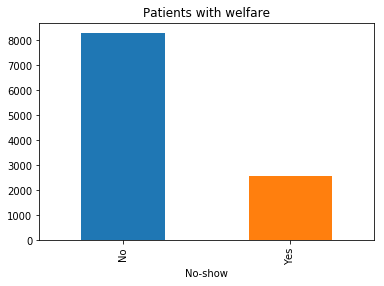

In [24]:
#Chart which shows patients with welfare scheme that either show or didn't show for appointment
df.groupby(['No-show'])['Scholarship'].sum().plot(kind='bar', title='Patients with welfare');

About 23.7% of the Patients on the welfare scheme did not show up for their appointments. This shows that been part of the welfare program does not have much affect on patients not showing up for their appointments.

### Research Question 4  (What category of disease have more patients with no show Appointment)

In [25]:
#Getting the sum of each category of disesases with No Show appointment
no_show[['Alcoholism','Diabetes','Handcap','Hipertension']].sum()

Alcoholism       677
Diabetes        1430
Handcap          453
Hipertension    3772
dtype: int64

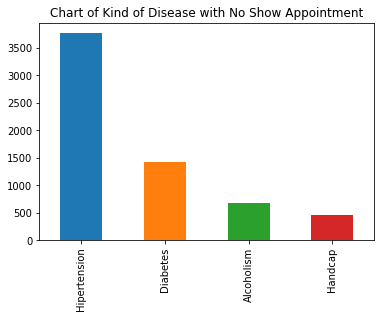

In [26]:
#Plotting a bar chart to visualize the above information
no_show[['Hipertension','Diabetes','Alcoholism','Handcap']].sum().plot(kind='bar')
plt.title('Chart of Kind of Disease with No Show Appointment');

From the above chart, Patients with **Hipertension** did not show up more for their appointments

### Research Question 5  (Do people that receive SMS show up for their Appointment?)

In [27]:
#To get the proportion of patients that received SMS and didn't show up for their Appointments
NoShow_SMSprop = no_show.SMS_received.sum()/df.SMS_received.sum()
NoShow_SMSprop

0.27574544839637

72.4% of Patients that receieved SMS as regards their appointment showed up for it while 27.6% of the Patients didn't show up

### Research Question 6  (What Gender Didn't show up most for their appointments?)

In [28]:
#Propoertion of each gender that did not show up for their Appointments
Noshow_gender = no_show.Gender.value_counts()
gender_prop = Noshow_gender/no_show.shape[0]
gender_prop

F    0.653882
M    0.346118
Name: Gender, dtype: float64

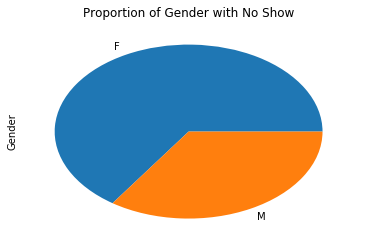

In [29]:
#Pie chart visualizing the above findings
gender_prop.plot(kind='pie', title='Proportion of Gender with No Show' );

Female patients make up about 65.4% of patients that didn't show up for their appointment while Male patients make up 34.6%.

In [30]:
# Getting the counts of patients that have their AppointmentDay After ScheduledDay
count_SA = df.query('ScheduledDay <= AppointmentDay').shape[0]
count_SA

71959

In [31]:
count_SA/df.shape[0]

0.6510535887158794

<a id='conclusions'></a>
## Conclusions

From the above exploratory analysis, the following can be concluded below:
1. About 20% of the patients didn't show up for their appointments which was further explored by looking at the different attributes of the patients. It was observed that the different attributes such as **Scholarshop**, **SMS Received**, **Age** did not have significant effects on patients missing their appointments. Though there might be further ways of exploring the data to get more insights using Machine Learning.
2. One major limitation is not being able to use the **ScheduleDay** and **AppointmentDay** columns for analysis because further check shows that about 71,959 patients which is 65.1% of our data had their AppointmentDay After the ScheduledDay which is not meant to be, thereby limiting the use of the 2 columns for analysis.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0